## Drone Price Prediction

### Introduction about the Data :

**The dataset** This project aims to predict the actual price by comparing different drone models. The dataset contains various drone models, their specifications, and their actual prices (including discounts). This project involves preprocessing the datasets and applying machine learning models.

There are 8 independent variables :

* `Name` :

#### Importing Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/drone.csv")

In [3]:
df.head()

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",Mini Drone,40,Lithium Battery,200,2297.0,4999.0,54.0
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,Mini Drone,300,AA Battery,500,10255.0,11000.0,6.0
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,Professional Drone,102,AA Rechargeable Battery,150,1994.0,5999.0,66.0
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...,Mini Drone,50,Lithium Battery,150,2455.0,4999.0,50.0
4,Orivox M3 Max Mini Drone with Pro Features HD ...,Mini Drone,200,Lithium Battery,200,4998.0,5999.0,16.0


In [4]:
df.shape

(821, 8)

#### Check Duplicated Values

In [5]:
df.duplicated().sum()

3

> There are 3 duplicated values in the data

In [6]:
df[df.duplicated()]

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
478,Swa Mi E88 Pro Foldable Remote Control Drone D...,Professional Drone,100,Lithium Battery,100,2705.0,8999.0,69.0
609,Swa Mi Mini dron with Camera Hd Dual Camera Wi...,Professional Drone,100,Lithium Battery,100,2244.0,8999.0,75.0
630,"Swa Mi High Quality E88 Pro Drone HD, Dual Cam...",Professional Drone,100,Lithium Battery,100,2705.0,8999.0,69.0


> We cannot count this as duplicates

#### Check Missing Values

In [7]:
df.isnull().sum()

Name              0
Type              0
Control Range     0
Battery Type      0
Weight            0
Price             8
Actual Price      8
Discount (%)     11
dtype: int64

> There are `8` missing values in `Price`, `8` missing values in `Actual Price` and `11` missing values in `Discount (%)` columns. In this Project my aim is to predict `Actual Price`. so the rows which doesn't contain actual price doesn't have relevance in the model. So it is better to drop them.

In [8]:
df['Price'].fillna(df['Price'].median(), inplace=True)
df['Discount (%)'].fillna(df['Discount (%)'].median(), inplace=True)

In [9]:
df = df.dropna(subset=['Actual Price'])

In [10]:
df.isnull().sum()

Name             0
Type             0
Control Range    0
Battery Type     0
Weight           0
Price            0
Actual Price     0
Discount (%)     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 820
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           813 non-null    object 
 1   Type           813 non-null    object 
 2   Control Range  813 non-null    int64  
 3   Battery Type   813 non-null    object 
 4   Weight         813 non-null    int64  
 5   Price          813 non-null    float64
 6   Actual Price   813 non-null    float64
 7   Discount (%)   813 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 57.2+ KB


#### Data Unbalance

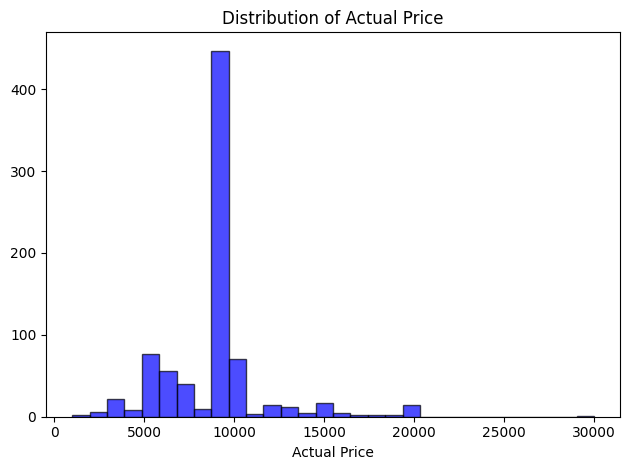

In [12]:
plt.hist(df['Actual Price'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Actual Price')
plt.title('Distribution of Actual Price')
plt.tight_layout()
plt.show()

> A Large concentration around 9,000-10,000. A long tail to the right (some drones priced much higher, even close to 30,000). This is a sign of right-skewed distribution (positive skew).

In [13]:
df['Actual Price'].skew()

1.5232860809570283

In [14]:
df['log Actual Price'] = np.log1p(df['Actual Price'])

> Since this is highly Right skewed so i try to apply log transformation for better results.

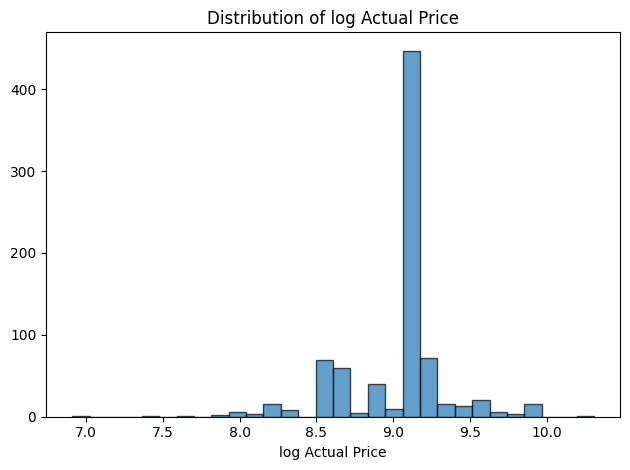

In [15]:
plt.hist(df['log Actual Price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of log Actual Price')
plt.xlabel('log Actual Price')
plt.tight_layout()
plt.show()

#### Data Exploration

##### Univariate Analysis

In [16]:
df.head()

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%),log Actual Price
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",Mini Drone,40,Lithium Battery,200,2297.0,4999.0,54.0,8.517193
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,Mini Drone,300,AA Battery,500,10255.0,11000.0,6.0,9.305741
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,Professional Drone,102,AA Rechargeable Battery,150,1994.0,5999.0,66.0,8.699515
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...,Mini Drone,50,Lithium Battery,150,2455.0,4999.0,50.0,8.517193
4,Orivox M3 Max Mini Drone with Pro Features HD ...,Mini Drone,200,Lithium Battery,200,4998.0,5999.0,16.0,8.699515


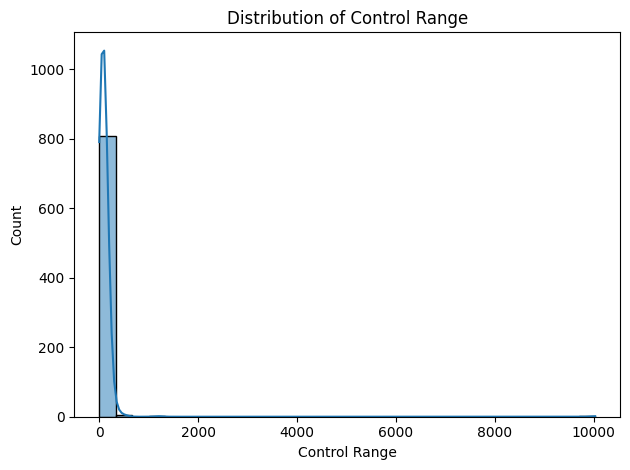

In [17]:
sns.histplot(df['Control Range'], bins=30, kde=True)
plt.title('Distribution of Control Range')
plt.tight_layout()
plt.show()

> Most of the Control Range concentrated on lower range.

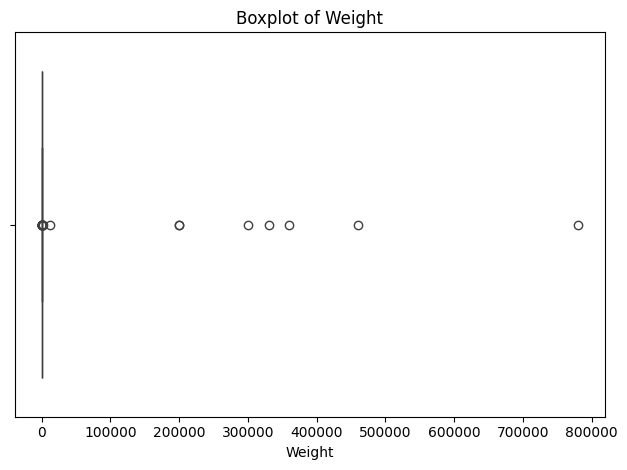

In [19]:
sns.boxplot(x=df['Weight'])
plt.title('Boxplot of Weight')
plt.tight_layout()
plt.show()

> for the weight column, there are outliers (like 800000grams = 800 kg) which is unrealistic, maybe dataentry mistake. So it is better to drop all the weights greater than 10000.

In [20]:
df = df[df['Weight'] < 10000]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 0 to 820
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              805 non-null    object 
 1   Type              805 non-null    object 
 2   Control Range     805 non-null    int64  
 3   Battery Type      805 non-null    object 
 4   Weight            805 non-null    int64  
 5   Price             805 non-null    float64
 6   Actual Price      805 non-null    float64
 7   Discount (%)      805 non-null    float64
 8   log Actual Price  805 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 62.9+ KB


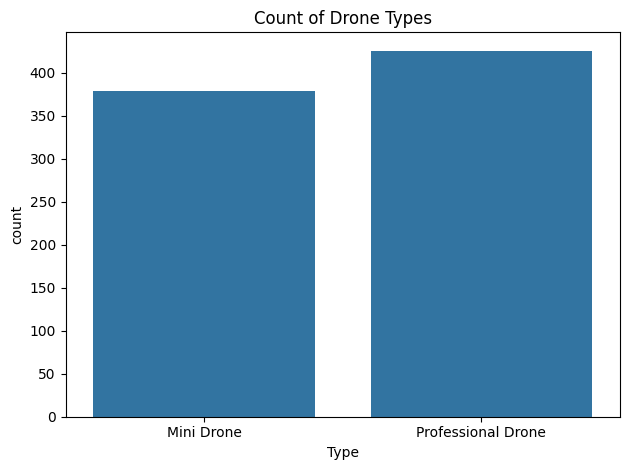

In [22]:
sns.countplot(x='Type', data=df)
plt.title('Count of Drone Types')
plt.tight_layout()
plt.show()

> As we can see it is fairly balance

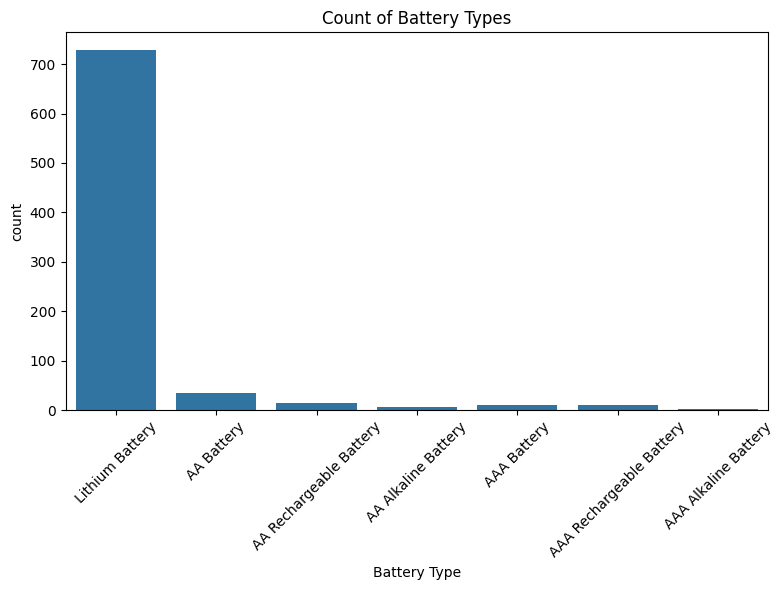

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Battery Type', data=df)
plt.title('Count of Battery Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Mostly used battery type is Lithium and before categorical encoding it is better to group them since its count is very low and not more samples to learn.

In [31]:
def simplify_battery_type(b):
    if b == 'Lithium Battery':
        return 'Lithium'
    elif 'Rechargeable' in b:
        return 'Rechargeable'
    elif 'Alkaline' in b:
        return 'Alkaline'
    else:
        return 'Disposable'
    
df['Battery Type'] = df['Battery Type'].apply(simplify_battery_type)

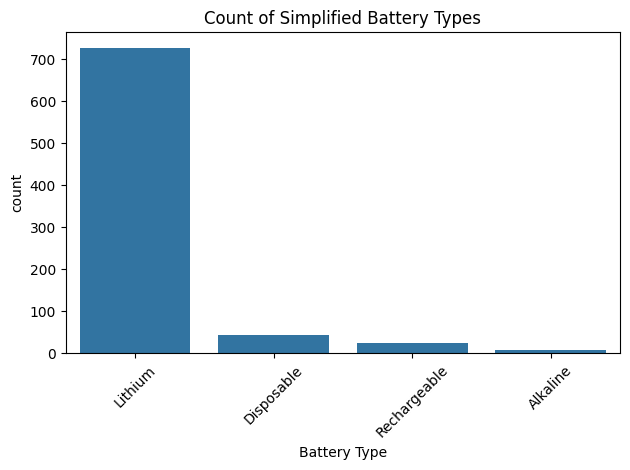

In [32]:
sns.countplot(x='Battery Type', data=df)
plt.xticks(rotation=45)
plt.title('Count of Simplified Battery Types')
plt.tight_layout()
plt.show()

##### Bivariate Analysis

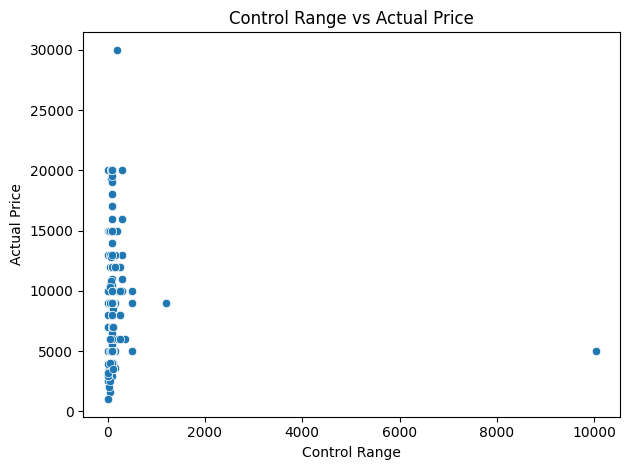

In [33]:
sns.scatterplot(x='Control Range', y='Actual Price', data=df)
plt.title('Control Range vs Actual Price')
plt.tight_layout()
plt.show()

> Mostly all of the values Control range values are concentrated in lower range. Only one value Control Range = 10000 is an outlier that means it can be distorted the prediction model, so drop it.

> Only control range has no significance in actual price.

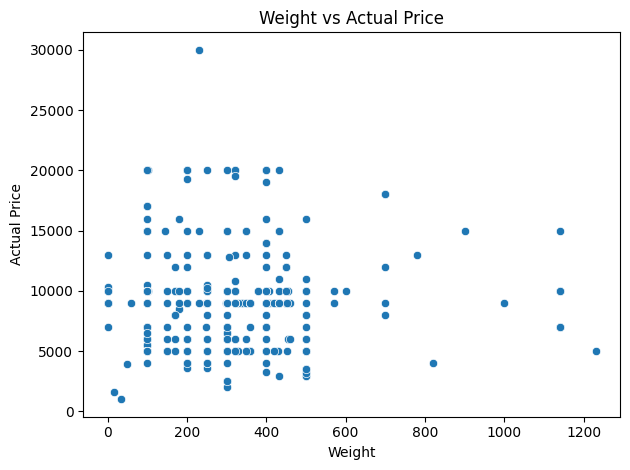

In [34]:
sns.scatterplot(x='Weight', y='Actual Price', data=df)
plt.title('Weight vs Actual Price')
plt.tight_layout()
plt.show()

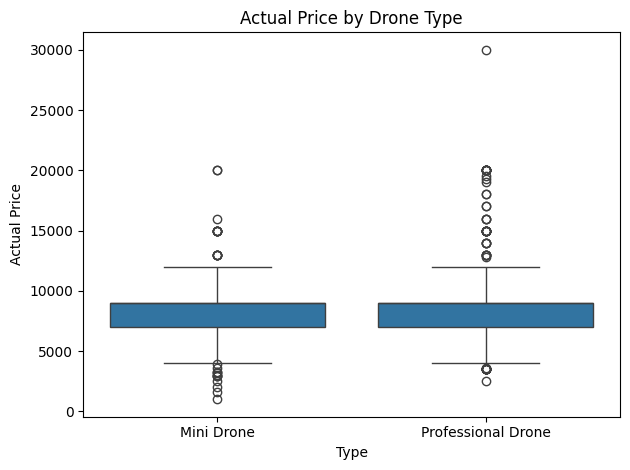

In [35]:
sns.boxplot(x='Type', y="Actual Price", data=df)
plt.title('Actual Price by Drone Type')
plt.tight_layout()
plt.show()

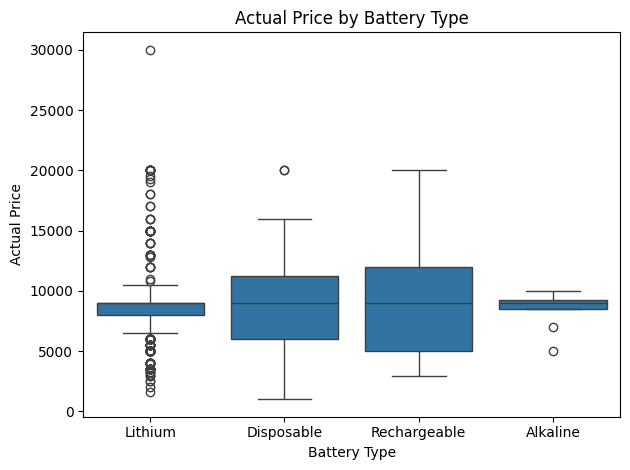

In [36]:
sns.boxplot(x="Battery Type", y="Actual Price", data=df)
plt.title('Actual Price by Battery Type')
plt.tight_layout()
plt.show()

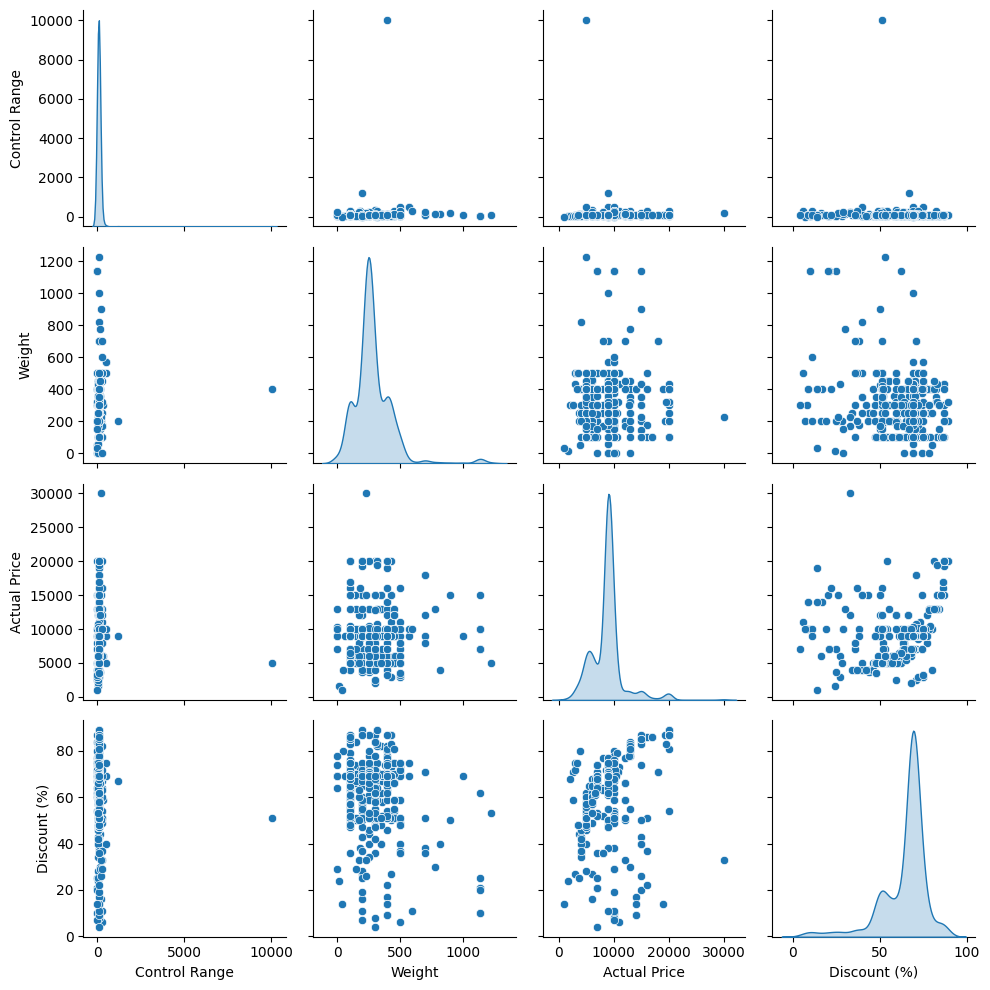

In [37]:
sns.pairplot(df[['Control Range', 'Weight', 'Actual Price', 'Discount (%)']], diag_kind='kde')
plt.tight_layout()
plt.show()

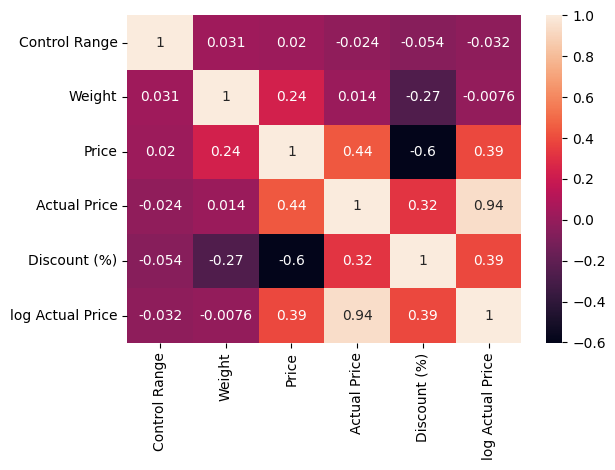

In [40]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()